In [24]:
import os
import numpy as np 
import pandas as pd
import sklearn

from glob import glob

# vis 
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

os.chdir(r'C:\Users\calix\OneDrive\바탕 화면\데이터 모음\2022빅콘테스트_데이터분석리그_데이터분석분야_퓨처스부문_데이터셋_220908')

In [25]:
train_dset = pd.read_csv('train_final.csv')
train_dset.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,gender,credit_score,...,company_year,age_group,year,month,day,bank_id_cat,debt_ratio,over_debt,loan_amt_per_once,product_id_cat
0,2157865,2022-05-09 08:44:59,54,235,20000000.00000,16.50000,1.00000,346970.00000,1.00000,540.00000,...,9.00000,5.00000,2022,5,1,0,5.06250,1,13500000.00000,0
1,576643,2022-05-09 10:54:53,54,235,11000000.00000,16.50000,0.00000,545882.00000,1.00000,580.00000,...,3.00000,4.00000,2022,5,1,0,1.47222,0,15142857.14286,0
2,576643,2022-05-09 10:54:53,11,118,3000000.00000,20.00000,0.00000,545882.00000,1.00000,580.00000,...,3.00000,4.00000,2022,5,1,0,1.47222,0,15142857.14286,0
3,2136706,2022-05-09 10:41:06,42,216,10000000.00000,13.50000,0.00000,558819.00000,1.00000,740.00000,...,10.00000,4.00000,2022,5,1,0,1.48718,0,29000000.00000,0
4,2136706,2022-05-09 10:41:07,25,169,22000000.00000,15.90000,0.00000,558819.00000,1.00000,740.00000,...,10.00000,4.00000,2022,5,1,0,1.48718,0,29000000.00000,0


In [26]:
train_dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10264386 entries, 0 to 10264385
Data columns (total 30 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   application_id              int64  
 1   loanapply_insert_time       object 
 2   bank_id                     int64  
 3   product_id                  int64  
 4   loan_limit                  float64
 5   loan_rate                   float64
 6   is_applied                  float64
 7   user_id                     float64
 8   gender                      float64
 9   credit_score                float64
 10  yearly_income               float64
 11  income_type                 int64  
 12  employment_type             int64  
 13  houseown_type               int64  
 14  desired_amount              float64
 15  purpose                     int64  
 16  personal_rehabilitation_yn  float64
 17  existing_loan_cnt           float64
 18  existing_loan_amt           float64
 19  event              

# 범주형 시각화

<AxesSubplot:xlabel='bank_id', ylabel='Density'>

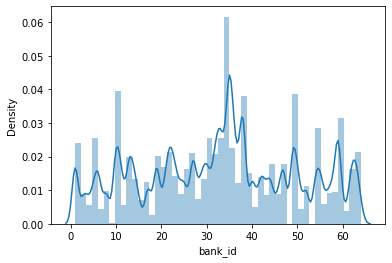

In [27]:
sns.distplot(train_dset['bank_id'])

<AxesSubplot:xlabel='product_id', ylabel='Density'>

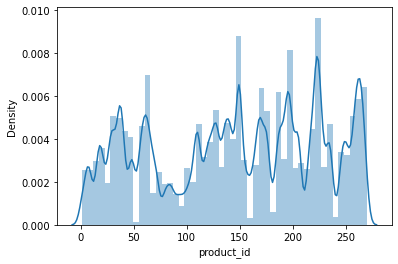

In [28]:
sns.distplot(train_dset['product_id'])

<AxesSubplot:xlabel='is_applied', ylabel='count'>

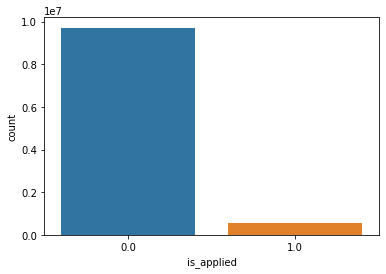

In [29]:
sns.countplot(data=train_dset, x='is_applied')

<AxesSubplot:xlabel='gender', ylabel='count'>

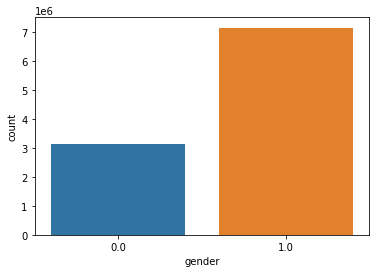

In [30]:
sns.countplot(data=train_dset, x='gender')

<AxesSubplot:xlabel='income_type', ylabel='count'>

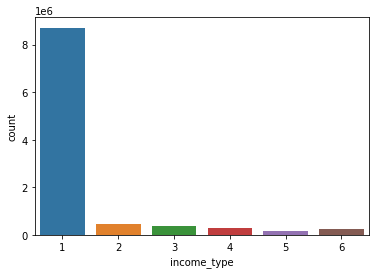

In [31]:
sns.countplot(data=train_dset, x='income_type')

<AxesSubplot:xlabel='employment_type', ylabel='count'>

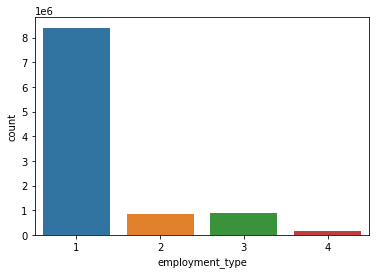

In [32]:
sns.countplot(data=train_dset, x='employment_type')

<AxesSubplot:xlabel='houseown_type', ylabel='count'>

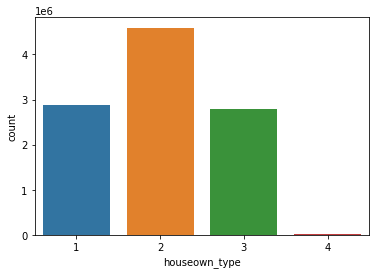

In [33]:
sns.countplot(data=train_dset, x='houseown_type')

<AxesSubplot:xlabel='purpose', ylabel='count'>

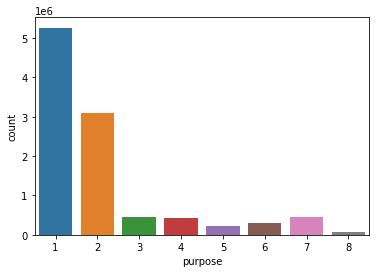

In [34]:
sns.countplot(data=train_dset, x='purpose')

<AxesSubplot:xlabel='personal_rehabilitation_yn', ylabel='count'>

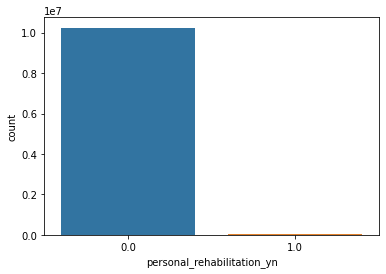

In [35]:
sns.countplot(data=train_dset, x='personal_rehabilitation_yn')

<AxesSubplot:xlabel='existing_loan_cnt', ylabel='Density'>

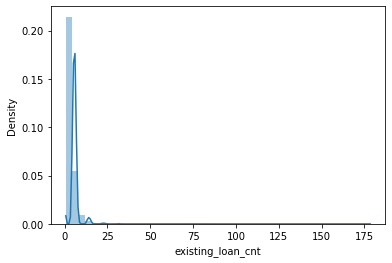

In [36]:
sns.distplot(train_dset['existing_loan_cnt'])

<AxesSubplot:xlabel='company_year', ylabel='Density'>

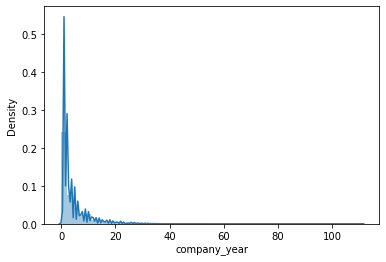

In [37]:
sns.distplot(train_dset['company_year'])

<AxesSubplot:xlabel='age_group', ylabel='count'>

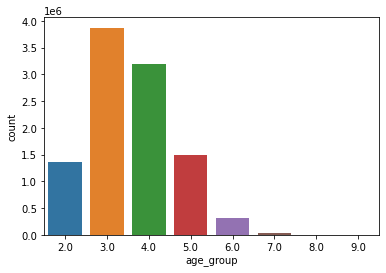

In [38]:
sns.countplot(data=train_dset, x='age_group')

<AxesSubplot:xlabel='bank_id_cat', ylabel='count'>

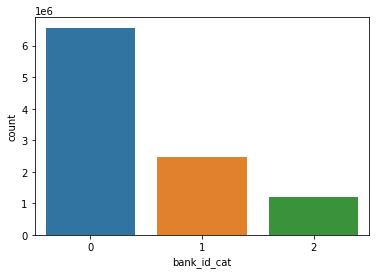

In [39]:
sns.countplot(data=train_dset, x='bank_id_cat')

<AxesSubplot:xlabel='over_debt', ylabel='count'>

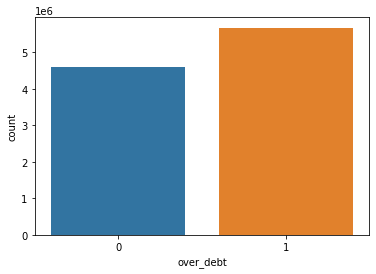

In [40]:
#기대출 과다자
sns.countplot(data=train_dset, x='over_debt')

<AxesSubplot:xlabel='product_id_cat', ylabel='count'>

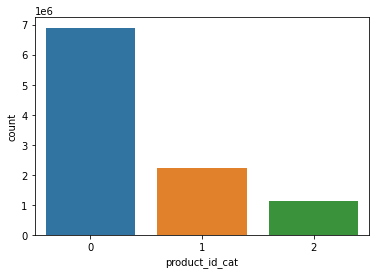

In [41]:
sns.countplot(data=train_dset, x='product_id_cat')

In [44]:
#신용등급 범주 생성
credit_bins =pd.cut(train_dset['credit_score'], bins=[0,335,454,530,630,698,768, 832, 891, 942, 1000], 
                 labels=['10등급','9등급','8등급','7등급','6등급','5등급','4등급', '3등급','2등급','1등급'])
credit_bins

##새로 만든 열 삽임
train_dset.insert(10,'credit_level',credit_bins)

<AxesSubplot:xlabel='credit_level', ylabel='count'>

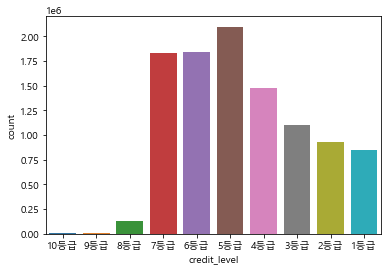

In [45]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.countplot(data=train_dset, x='credit_level')

# 연속형 시각화

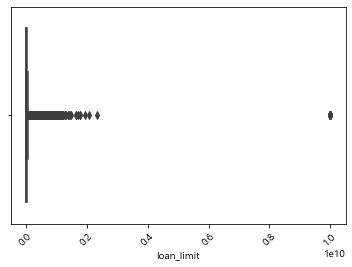

In [46]:
ax = sns.boxplot(x='loan_limit', data= train_dset)

plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='loan_rate', ylabel='Density'>

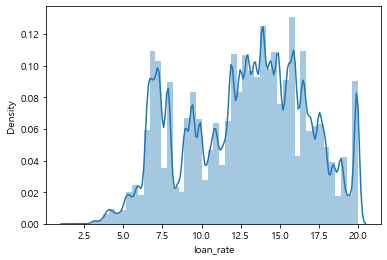

In [47]:
sns.distplot(train_dset['loan_rate'])

<AxesSubplot:xlabel='credit_score', ylabel='Density'>

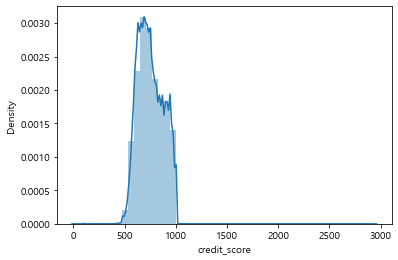

In [48]:
sns.distplot(train_dset['credit_score'])

<AxesSubplot:xlabel='yearly_income', ylabel='Density'>

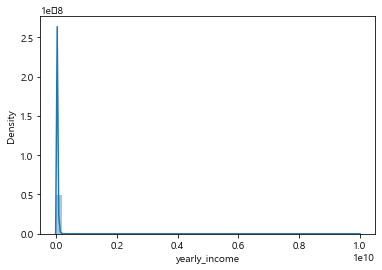

In [49]:
sns.distplot(train_dset['yearly_income'])

<AxesSubplot:xlabel='desired_amount', ylabel='Density'>

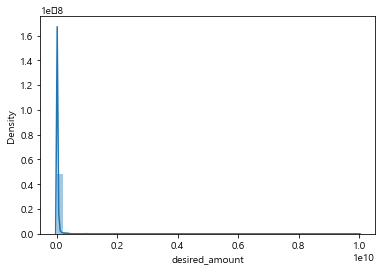

In [50]:
sns.distplot(train_dset['desired_amount'])

<AxesSubplot:xlabel='existing_loan_amt', ylabel='Density'>

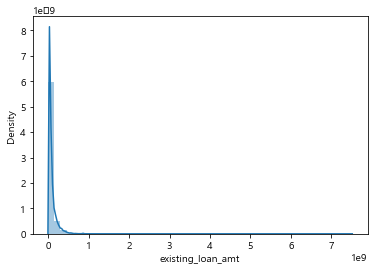

In [51]:
sns.distplot(train_dset['existing_loan_amt'])

<AxesSubplot:xlabel='event', ylabel='Density'>

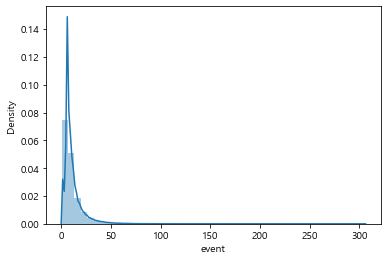

In [52]:
sns.distplot(train_dset['event'])

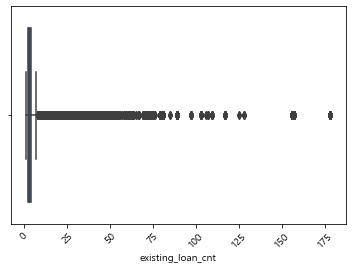

In [53]:
ax = sns.boxplot(x='existing_loan_cnt', data= train_dset)

plt.xticks(rotation=45)
plt.show()

# 변수 간 관계 시각화

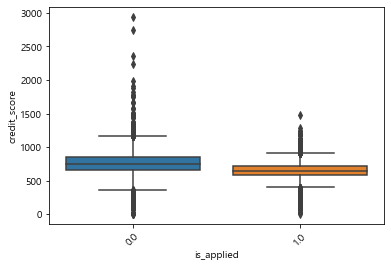

In [54]:
#신용점수와 종속변수
ax = sns.boxplot(y='credit_score', data= train_dset, x= 'is_applied')

plt.xticks(rotation=45)
plt.show()

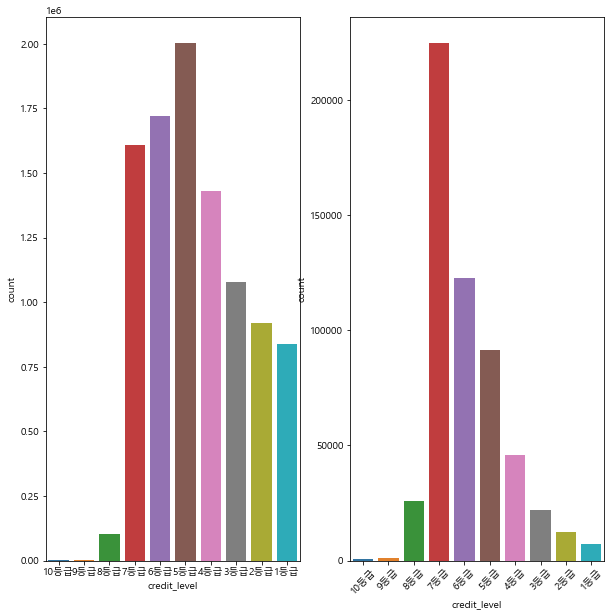

In [55]:
#신용등급과 종속변수
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,10))

sns.countplot(data=ct[ct['is_applied']==0], x='credit_level', ax=ax[0])
sns.countplot(data=ct[ct['is_applied']==1], x='credit_level', ax=ax[1])

plt.xticks(rotation=45)
plt.show()

# 기간별 시각화

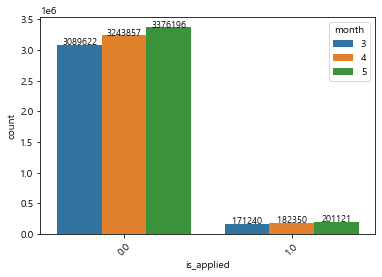

In [56]:
ax = sns.countplot(x='is_applied', data=train_dset, hue='month')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha='center', size=9)
    
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='credit_score'>

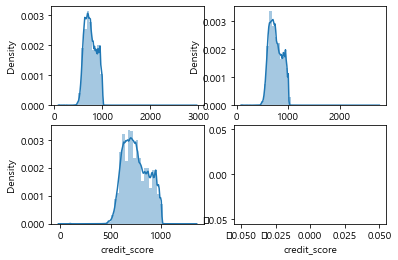

In [57]:
fig, ax = plt.subplots(ncols=2, nrows=2)

sns.distplot(train_dset[train_dset['month']==3]['credit_score'], ax=ax[0,0])
sns.distplot(train_dset[train_dset['month']==4]['credit_score'], ax=ax[0,1])
sns.distplot(train_dset[train_dset['month']==5]['credit_score'], ax=ax[1,0])
sns.distplot(train_dset[train_dset['month']==6]['credit_score'], ax=ax[1,1])

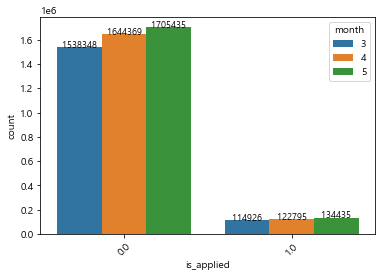

In [58]:
ax = sns.countplot(x='is_applied', data=train_dset[train_dset['purpose']==1], hue='month')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha='center', size=9)
    
plt.xticks(rotation=45)
plt.show()

# 상관 관계

In [59]:
#3개 이상의 범주형 상관관계 파악(cramers_v 방식)

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = sst.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [62]:
import scipy.stats as sst

att = ['income_type','employment_type','houseown_type','purpose','credit_level','age_group','gender','month','bank_id_cat','over_debt','product_id_cat','is_applied']
cor = pd.DataFrame()
for i in att:
    for j in att:
        cor.loc[i, j] = cramers_v(train_dset.loc[:, i], train_dset.loc[:, j])
for i in att:
    cor[i].astype(np.float)

cor

,income_type,employment_type,houseown_type,purpose,credit_level,age_group,gender,month,bank_id_cat,over_debt,product_id_cat,is_applied
income_type,1.00000,0.49493,0.04025,0.14983,0.06222,0.06304,0.09946,0.01248,0.05458,0.07225,0.06021,0.12297
employment_type,0.49493,1.00000,0.04167,0.07259,0.05837,0.07581,0.09426,0.00576,0.02852,0.05522,0.03706,0.09814
houseown_type,0.04025,0.04167,1.00000,0.07950,0.12027,0.15599,0.06511,0.00808,0.02991,0.08871,0.03719,0.03951
purpose,0.14983,0.07259,0.07950,1.00000,0.14637,0.04917,0.06470,0.05281,0.02046,0.06574,0.03233,0.08525
credit_level,0.06222,0.05837,0.12027,0.14637,1.00000,0.05519,0.07171,0.00915,0.04587,0.02967,0.08084,0.18299
age_group,0.06304,0.07581,0.15599,0.04917,0.05519,1.00000,0.04614,0.01627,0.02520,0.03396,0.03052,0.05229
gender,0.09946,0.09426,0.06511,0.06470,0.07171,0.04614,1.00000,0.00797,0.01210,0.05229,0.03129,0.01180
month,0.01248,0.00576,0.00808,0.05281,0.00915,0.01627,0.00797,1.00000,0.02673,0.02490,0.03096,0.00715
bank_id_cat,0.05458,0.02852,0.02991,0.02046,0.04587,0.02520,0.01210,0.02673,1.00000,0.00811,0.55815,0.13376
over_debt,0.07225,0.05522,0.08871,0.06574,0.02967,0.03396,0.05229,0.02490,0.00811,1.00000,0.01276,0.00640


<AxesSubplot:>

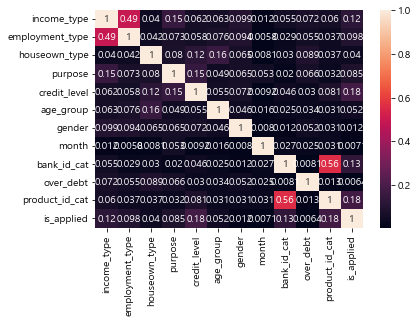

In [63]:
sns.heatmap(cor, annot=True, square=False)

In [64]:
#피어슨 상관관계 (연속형 변수)
ctcorr = train_dset[['credit_score','yearly_income','desired_amount','existing_loan_cnt','loan_limit','loan_rate','loan_amt_per_once']]

<AxesSubplot:>

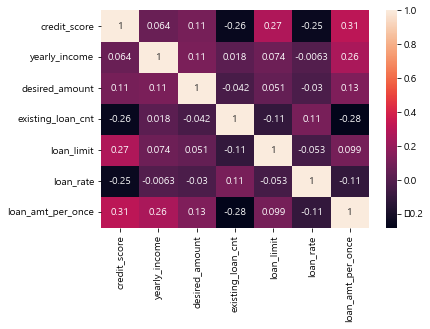

In [65]:
sns.heatmap(ctcorr.corr(method="pearson") ,annot=True)

# 파생변수 시각화

In [67]:
#평일/주말 파생변수 생성
train_dset['dayofweek'] = '평일'

con = (train_dset['day']>=5) & (train_dset['day']<7)
train_dset.loc[con,'dayofweek'] = '주말'

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

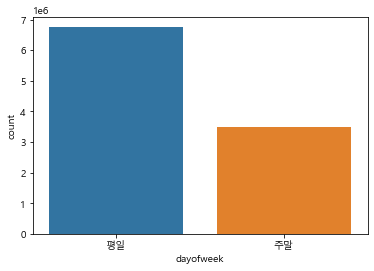

In [68]:
sns.countplot(data=train_dset, x='dayofweek')

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

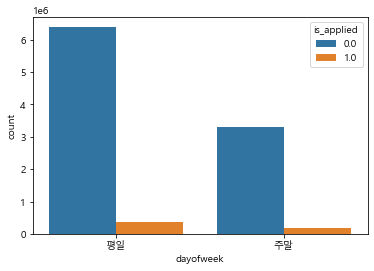

In [69]:
sns.countplot(data=train_dset, x='dayofweek', hue='is_applied')

In [70]:
print('평일 대출신청비율 : ',len(train_dset[(train_dset['dayofweek']=='평일') & (train_dset['is_applied']==1)]) / len(train_dset[train_dset['dayofweek']=='평일']))
print('주말 대출신청비율 : ',len(train_dset[(train_dset['dayofweek']=='주말') & (train_dset['is_applied']==1)]) / len(train_dset[train_dset['dayofweek']=='주말']))

평일 대출신청비율 :  0.05385932191154246
주말 대출신청비율 :  0.0543952503708151


In [72]:
# 시간 뽑아내기(loanapply_insert_time에서)
train_dset['loanapply_insert_time'] = pd.to_datetime(train_dset["loanapply_insert_time"])
train_dset['hour'] = train_dset['loanapply_insert_time'].dt.hour

In [73]:
train_dset['bank_open'] = '미영업'

con = (train_dset['hour']>=9) & (train_dset['hour']<16)
train_dset.loc[con,'bank_open'] = '영업'

<AxesSubplot:xlabel='bank_open', ylabel='count'>

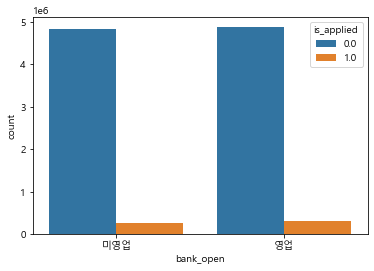

In [74]:
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.countplot(data=train_dset, x='bank_open', hue='is_applied')

In [75]:
print('영업 시간일 때 대출신청비율 : ',len(train_dset[(train_dset['bank_open']=='영업') & (train_dset['is_applied']==1)]) / len(train_dset[train_dset['bank_open']=='영업']))
print('미영업 시간일 때 대출신청비율 : ',len(train_dset[(train_dset['bank_open']=='미영업') & (train_dset['is_applied']==1)]) / len(train_dset[train_dset['bank_open']=='미영업']))

영업 시간일 때 대출신청비율 :  0.05768393325409943
미영업 시간일 때 대출신청비율 :  0.050341261227636803
